In [1]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.preprocessing import Imputer

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv("MVC.csv")
print(data.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'NUMTIME'],
      dtype='object')


In [4]:
feature_cols = data.columns[4]
resp_col = data.columns[11]
x = data[feature_cols].copy()
y = data[resp_col].copy()

In [5]:
def borough(x):
    if x=="QUEENS":
        return 1
    if x=='BROOKLYN':
        return 2
    if x=='MANHATTAN':
        return 3
    if x=='BRONX':
        return 4
    if x=='STATEN ISLAND':
        return 5

In [7]:
data['BOROUGH2']=data['BOROUGH'].apply(borough)
print(borough)

<function borough at 0x1a1a802d40>


In [8]:
valuablecols=['NUMTIME','BOROUGH']
def replace_missing_value(data, valuablecols):

    imputer = Imputer(strategy="median")
    df_num = data[valuablecols]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def
data["NUMTIME"] = replace_missing_value(data,["NUMTIME"])
data = data.dropna(how='any', subset=['BOROUGH','NUMTIME','NUMBER OF PERSONS INJURED','LONGITUDE','LATITUDE','CONTRIBUTING FACTOR VEHICLE 1'])
print(data.isnull().any())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


CRASH DATE                       False
CRASH TIME                       False
BOROUGH                          False
ZIP CODE                          True
LATITUDE                         False
LONGITUDE                        False
LOCATION                         False
ON STREET NAME                    True
CROSS STREET NAME                 True
OFF STREET NAME                   True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED          True
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1    False
CONTRIBUTING FACTOR VEHICLE 2     True
CONTRIBUTING FACTOR VEHICLE 3     True
CONTRIBUTING FACTOR VEHICLE 4     True
CONTRIBUTING FACTOR VEHICLE 5     True
COLLISION_ID                     False
VEHICLE TYPE CODE 1               True
VEHICLE TYPE CODE 2      

In [9]:
def injured_to_binary(x):
        if x>= 1:
            return 1
        else:
            return 0
data['affected']=data['NUMBER OF PERSONS INJURED']+data['NUMBER OF PERSONS KILLED']
data['affected'] = data['affected'].apply(injured_to_binary)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


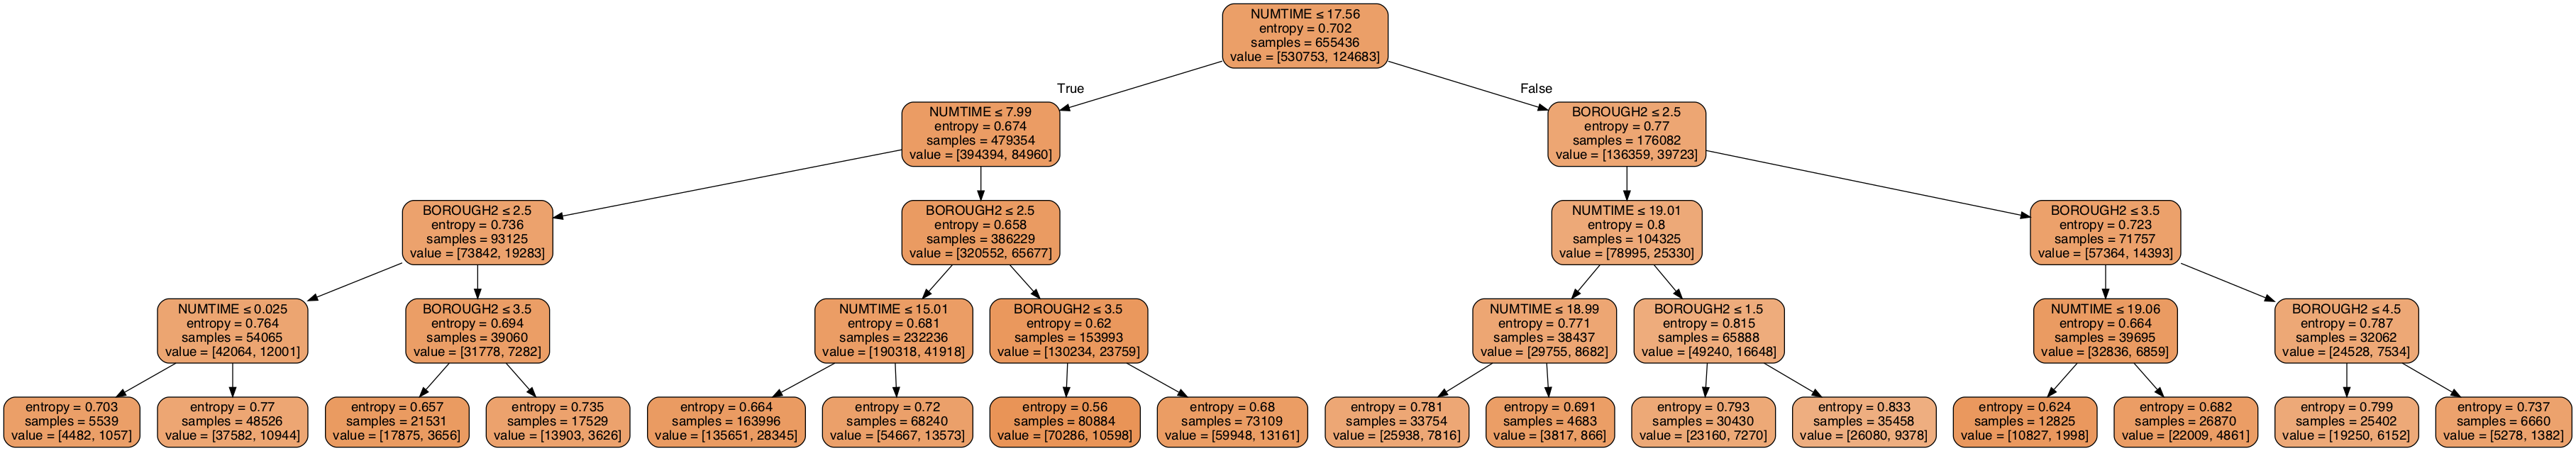

In [13]:
X_feat = data[['NUMTIME','BOROUGH2']]
y = data['affected']
t = DecisionTreeClassifier(max_depth=4,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [15]:
X_feat = data[['NUMTIME','BOROUGH2']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.810669
2   0.810669
3   0.810669
4   0.810669
5   0.810669
10  0.810593
15  0.810372
20  0.810059
25  0.809906
30  0.809807


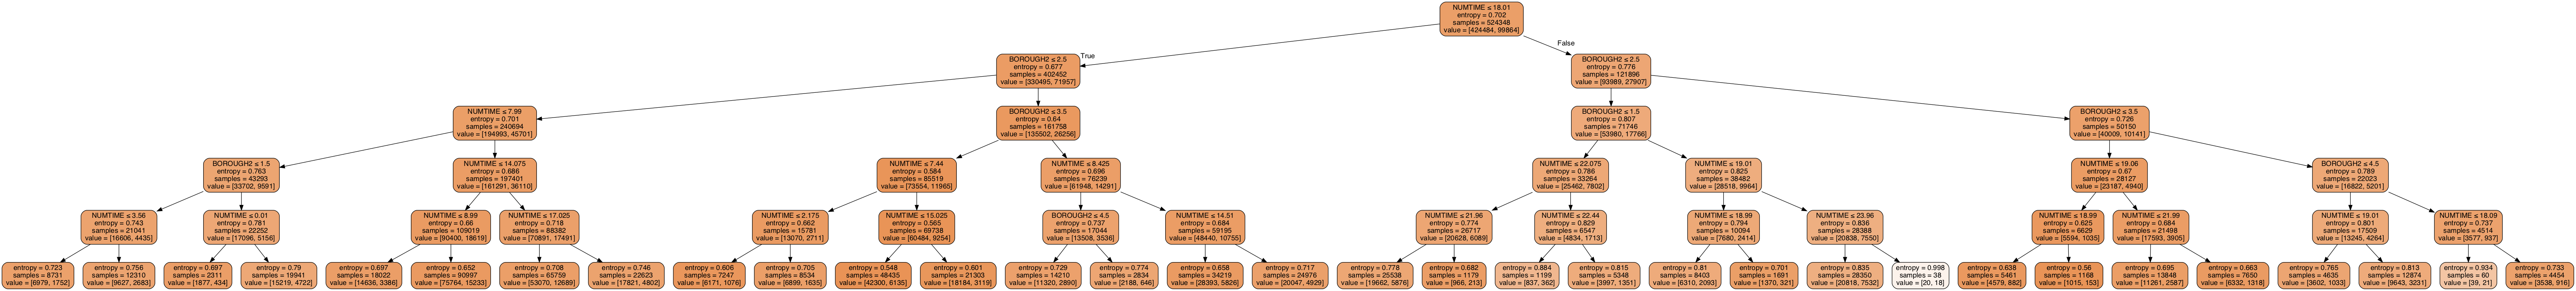

In [23]:
t = DecisionTreeClassifier(max_depth=5,criterion='entropy')

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [25]:
pd.DataFrame({'feature':['NUMTIME','BOROUGH'], 'importance':t.feature_importances_})


,feature,importance
0,NUMTIME,0.587978
1,BOROUGH,0.412022


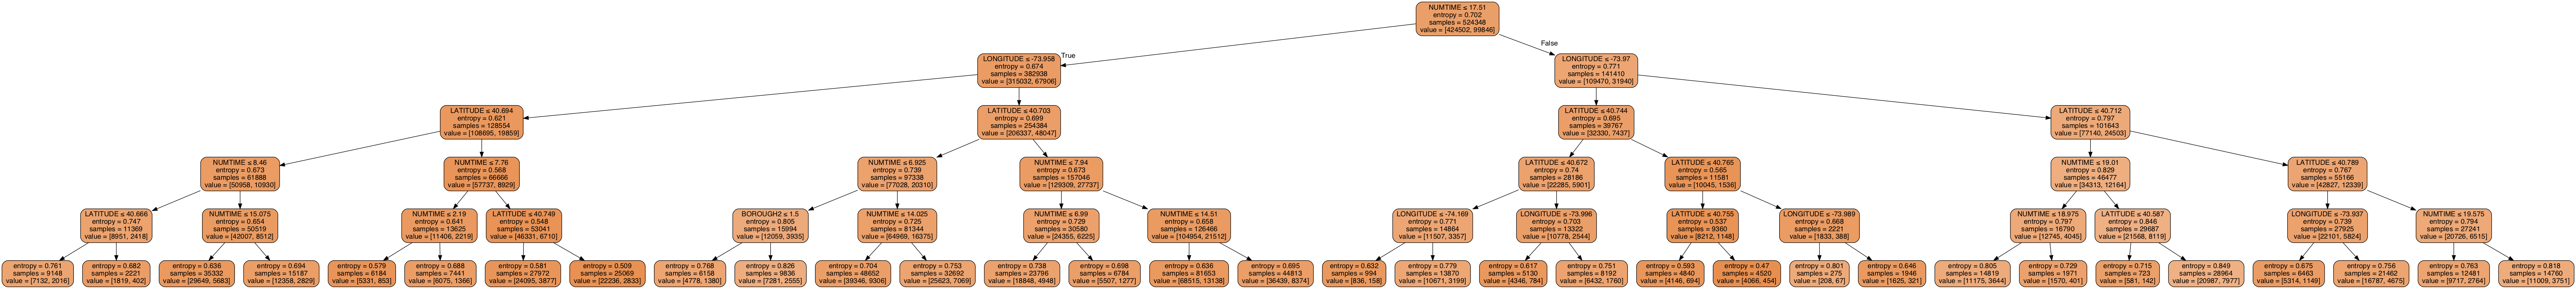

In [26]:
X_feat = data[['NUMTIME','BOROUGH2','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=5,criterion='entropy')

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
pd.DataFrame({'feature':['NUMTIME','BOROUGH','LATITUDE','LONGITUDE'], 'importance':t.feature_importances_})



,feature,importance
0,NUMTIME,0.452257
1,BOROUGH,0.004628
2,LATITUDE,0.301716
3,LONGITUDE,0.241399


In [17]:
X_feat = data[['NUMTIME','BOROUGH2','LATITUDE','LONGITUDE']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3,4]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  8.2min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.809771
1,entropy,2,4,20,0.809771
2,entropy,2,2,20,0.809771
3,entropy,2,2,30,0.809771
4,entropy,2,2,40,0.809771
5,entropy,2,2,50,0.809771
6,entropy,2,2,60,0.809771
7,entropy,2,3,10,0.809771
8,entropy,2,3,20,0.809771
9,entropy,2,3,30,0.809771


In [21]:
X_feat = data[['NUMTIME','BOROUGH2']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.4min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.809771
1,entropy,2,1,20,0.809771
2,entropy,3,1,20,0.809771
3,entropy,3,1,10,0.809771
4,entropy,2,2,60,0.809771
5,entropy,2,2,50,0.809771
6,entropy,2,2,40,0.809771
7,entropy,2,2,30,0.809771
8,entropy,2,2,20,0.809771
9,entropy,2,2,10,0.809771


In [28]:
X_feat = data[['NUMTIME','LATITUDE']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.6min finished


,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,mean_test_score
0,gini,1,1,10,0.809771
1,gini,1,1,20,0.809771
2,entropy,3,1,50,0.809771
3,entropy,3,1,40,0.809771
4,entropy,3,1,30,0.809771
5,entropy,3,1,20,0.809771
6,entropy,3,1,10,0.809771
7,entropy,2,2,60,0.809771
8,entropy,2,2,50,0.809771
9,entropy,2,2,40,0.809771


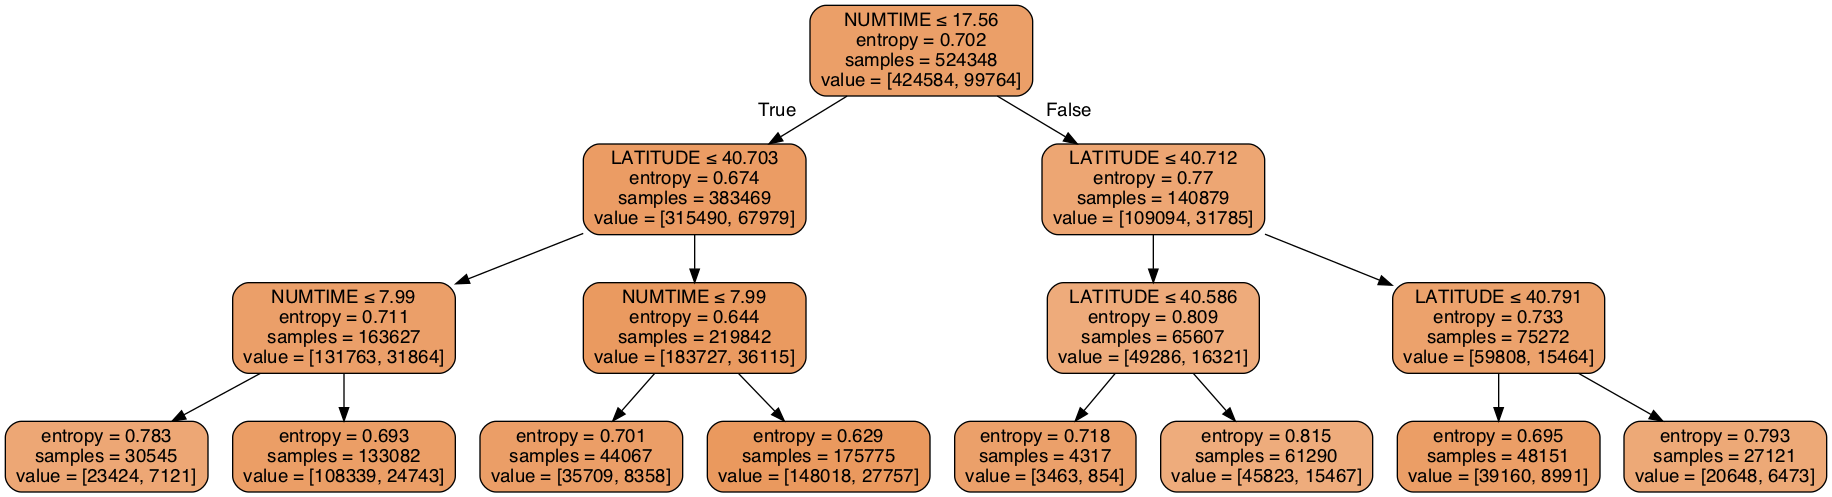

In [29]:
X_feat = data[['NUMTIME','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
conda install graphviz

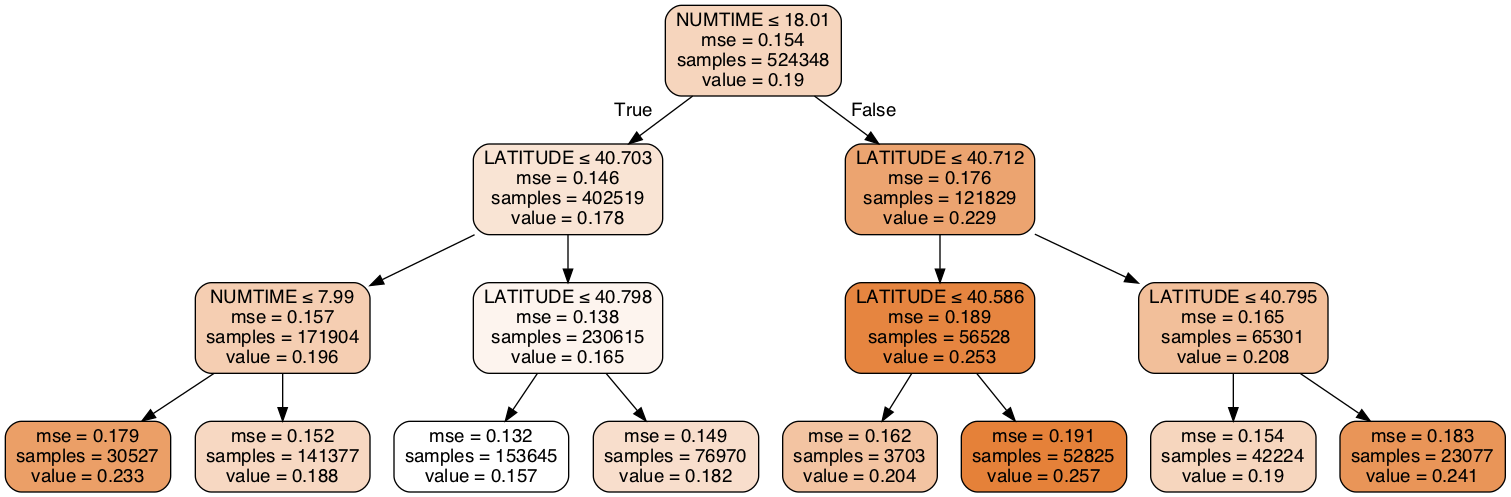

In [32]:
X_feat = data[['NUMTIME','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [33]:
pd.DataFrame({'feature':['NUMTIME','LATITUDE'], 'importance':t.feature_importances_})


,feature,importance
0,NUMTIME,0.551437
1,LATITUDE,0.448563


In [36]:
#get data
X_feat = data[['NUMTIME','LATITUDE']]

y = data['affected']

#split into train/test
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,
                                                                          test_size=0.3,
                                                                          random_state=2)

# generate random forest with grid search
rf_slump = RandomForestRegressor(n_estimators=100)

########################################

#train random forests
rf_slump.fit(X_feat_train,y_feat_train)


#get rmse on test set
print("test error for slump: ",np.sqrt(mean_squared_error(y_feat_test,
                                                          rf_slump.predict(X_feat_test))))



test error for slump:  0.4366584118291824
